We know we have a dataset of posters from films from different years categories and genres.

The first questions which come in mind. 

- How many images do i have?
- Whats the distribution per year?
- Which genres do i have.

The data is right now saved as a mongo db objects. If we want to use it we must parse it to json. First define the methods.

In [54]:
import json
import re
    
def to_json(string: str):
    # Load the data as a string and parse it to json.

    # Find all JSON-like structures in the string
    matches = re.findall(r"(\{.*?\})", string, re.DOTALL)
    result = []

    for match in matches:
        try:
            # Remove the ObjectId(*)
            movie = re.sub(r'ObjectId\("([^"]*)"\)', r'"\1"', match)
            movie_obj = json.loads(movie)
            result.append(movie_obj)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
            continue
    
    return result

In [ ]:
import os
import pandas as pd

folder = './data/Movie_Poster_Metadata'
filenames = os.listdir(folder)
movies = pd.DataFrame()

for filename in filenames:
    filepath = f"{folder}/{filename}"

    try:
        with open(file=filepath, mode='r', encoding='utf-16') as file:
            content = file.read() 
            data = to_json(content)
    except:
        with open(file=filepath, mode='r', encoding='utf-8') as file:
            content = file.read() 
            data = to_json(content)

    df = pd.DataFrame(data)
    movies = pd.concat([movies, pd.DataFrame(data)])
movies    

,_id,Language,Box_office,Country,Rated,imdbID,Awards,Poster,Director,Released,Writer,imdbVotes,Runtime,Response,imdbRating,Title,Genre,Actors,Type,Metascore
0,56fb860e71a0651b0c306f55,English,"290,158,751",USA,PG,tt0080684,Won 1 Oscar. Another 15 wins & 18 nominations.,http://ia.media-imdb.com/images/M/MV5BMjE2MzQw...,Irvin Kershner,20 Jun 1980,"Leigh Brackett (screenplay), Lawrence Kasdan (...","799,579",124 min,True,8.8,Star Wars: Episode V - The Empire Strikes Back,"Action, Adventure, Fantasy","Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",movie,79
1,56fb860e71a0651b0c306f56,English,"101,500,000",USA,R,tt0081562,1 nomination.,http://ia.media-imdb.com/images/M/MV5BMTM4OTI3...,Sidney Poitier,12 Dec 1980,Bruce Jay Friedman,"17,705",111 min,True,6.8,Stir Crazy,"Comedy, Crime","Gene Wilder, Richard Pryor, Georg Stanford Bro...",movie,50
2,56fb860e71a0651b0c306f57,English,"83,400,000",USA,PG,tt0080339,Nominated for 1 Golden Globe. Another 2 wins &...,http://ia.media-imdb.com/images/M/MV5BNDU2MjE4...,"Jim Abrahams, David Zucker, Jerry Zucker",02 Jul 1980,"Jim Abrahams (written for the screen by), Davi...","154,994",88 min,True,7.8,Airplane!,Comedy,"Kareem Abdul-Jabbar, Lloyd Bridges, Peter Grav...",movie,N/A
3,56fb860e71a0651b0c306f58,English,None,USA,PG,tt0080377,1 win.,http://ia.media-imdb.com/images/M/MV5BMTc5MTc5...,Buddy Van Horn,17 Dec 1980,"Jeremy Joe Kronsberg (characters), Stanford Sh...","12,639",116 min,True,6.0,Any Which Way You Can,"Action, Comedy","Clint Eastwood, Sondra Locke, Geoffrey Lewis, ...",movie,N/A
4,56fb860e71a0651b0c306f59,English,"69,800,000",USA,R,tt0081375,Nominated for 3 Oscars. Another 1 win & 3 nomi...,http://ia.media-imdb.com/images/M/MV5BMjIyNjkx...,Howard Zieff,10 Oct 1980,"Nancy Meyers, Charles Shyer, Harvey Miller","17,591",109 min,True,6.1,Private Benjamin,"Comedy, War","Goldie Hawn, Eileen Brennan, Armand Assante, R...",movie,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,570780c771a0650b20736c69,English,"1,711",USA,N/A,tt2912776,N/A,http://ia.media-imdb.com/images/M/MV5BMTk4ODE4...,John D. Hancock,27 Aug 2015,"Dorothy Tristan, Dorothy Tristan",9,110 min,True,7.2,The Looking Glass,"Drama, Music","Dorothy Tristan, Trish Basinger, Ed Ernstes, E...",movie,N/A
391,570780c771a0650b20736c6a,English,"1,631",Australia,UNRATED,tt2241750,8 wins & 3 nominations.,http://ia.media-imdb.com/images/M/MV5BMTcwNzc2...,Dean Francis,04 Mar 2015,"Stephen Davis, Dean Francis, Stephen Davis (play)",547,93 min,True,5.7,Drown,"Drama, Sport","Matt Levett, Maya Stange, Jack Matthews, Harry...",movie,N/A
392,570780c771a0650b20736c6b,English,"1,056",USA,N/A,tt4797082,N/A,N/A,Muffie Meyer,30 Oct 2015,N/A,N/A,64 min,True,N/A,Making Rounds,Documentary,N/A,movie,N/A
393,570780c771a0650b20736c6c,English,None,USA,N/A,tt5350540,N/A,N/A,N/A,25 Aug 2015,N/A,N/A,8 min,True,N/A,"Skin Trade: Behind the Action, Fighting You Ca...","Documentary, Short","Craig Baumgarten, Tony Jaa, Dolph Lundgren, Ro...",movie,N/A


Now since we parsed the metadata we can find out some more information about the dataset.

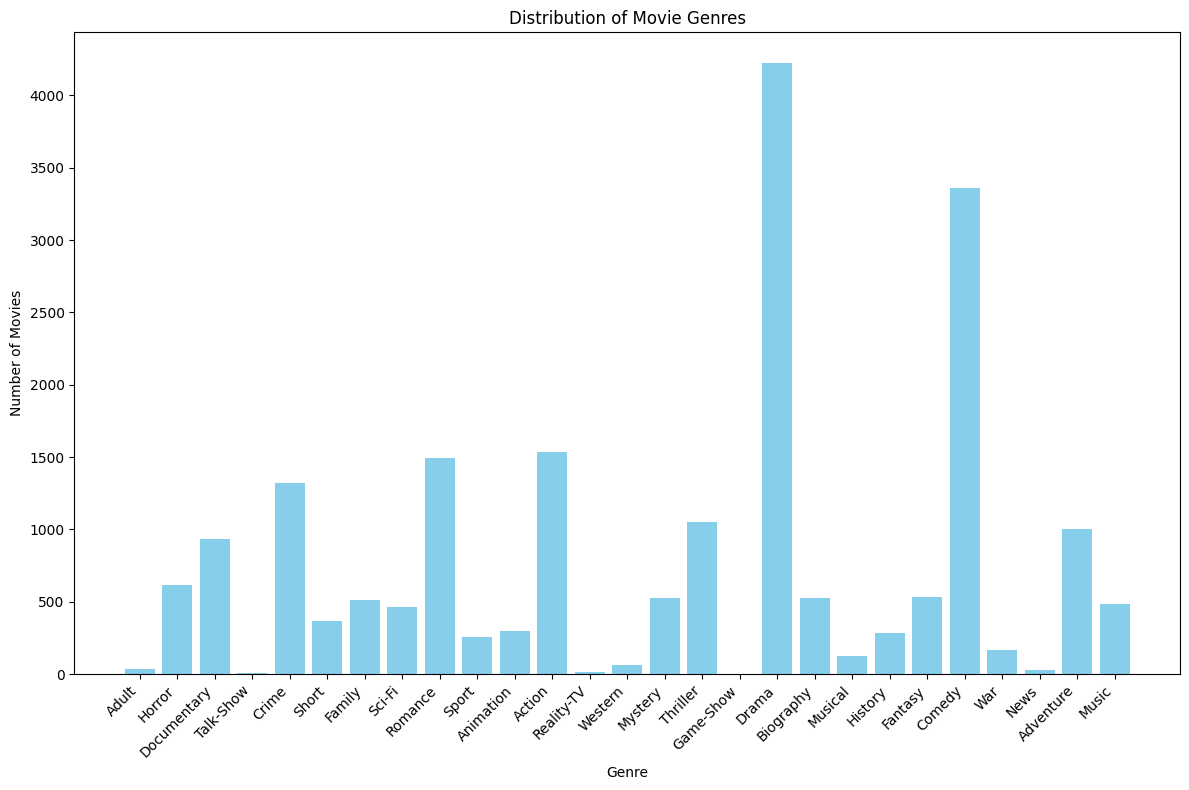

Total amount of images: 20226
Max number of images: 4225
Average number of images: 749.11
Minimum number of images: 3


In [77]:
import matplotlib.pyplot as plt

unique_genres = list(set([genre for movie in movies['Genre'] for genre in movie.split(', ') if genre != 'N/A']))
genres_count = {genre: 0 for genre in unique_genres}

# Count occurrences of each genre
for movie_genres in movies['Genre']:
    for genre in unique_genres:
        if genre in movie_genres:
            genres_count[genre] += 1

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(genres_count.keys(), genres_count.values(), color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print(f"Total amount of images: {sum(genres_count.values())}")
print(f"Max number of images: {max(genres_count.values())}")
print(f"Average number of images: {sum(genres_count.values()) / len(genres_count):.2f}")
print(f"Minimum number of images: {min(genres_count.values())}")

Max number of images: 4225
Average number of images: 749.11
Minimum number of images: 3
